
##**Credit Risk Analysis**

### **Importing the Data:**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("CreditDataset.xlsx")

## **Pre-processing:**

In [3]:
df.shape

(3000, 30)

In [4]:
df.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [5]:
#dropping customer ID column
df = df.drop('ID', axis = 1)
df.shape

(3000, 29)

**Data Imputations:**

In [6]:
#Finding the missing values:
df.isna().sum()

TARGET               0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-8-84ff46fd5d46>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.InqTimeLast,bins=14,color='sienna')
<ipython-input-8-84ff46fd5d46>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.TLCnt,bins=14,color='sienna')
<ipython-input-8-84ff46fd5d46>:8: UserWarning: 

`distplot` is a

<Axes: xlabel='TLOpen24Pct', ylabel='Density'>

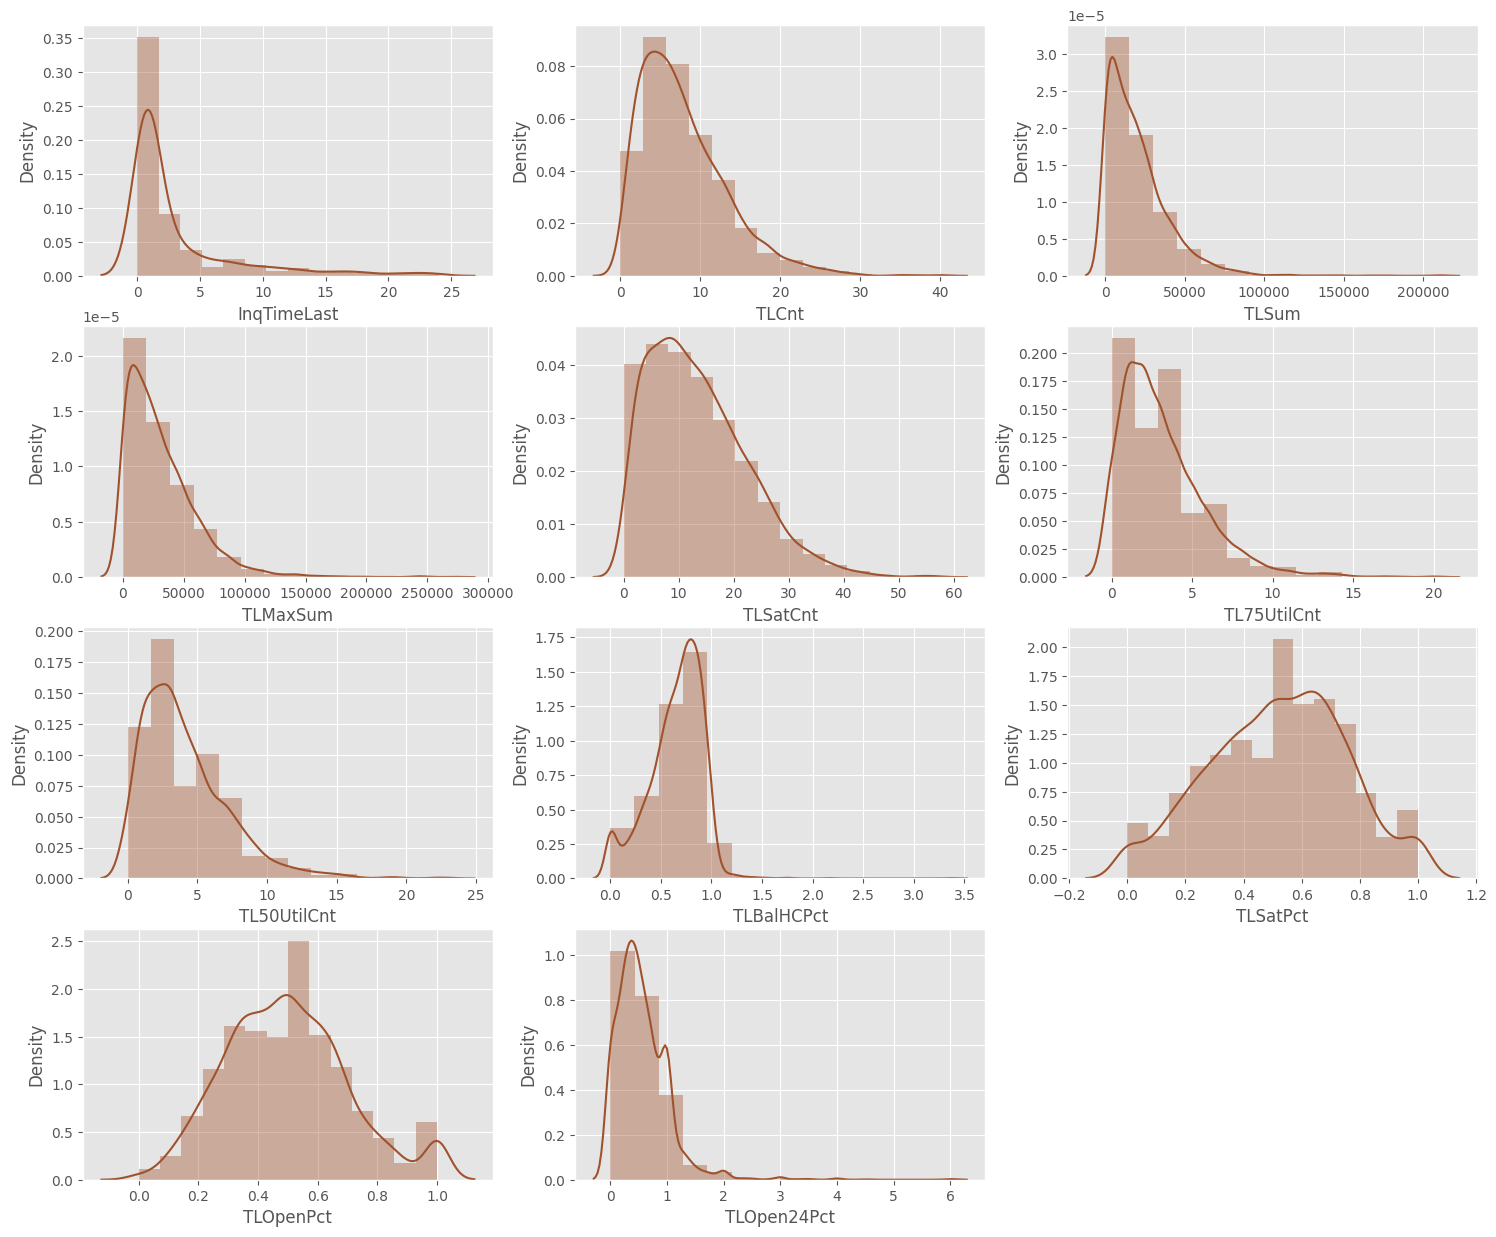

In [8]:
plt.figure(figsize = (18,15))
plt.style.use('ggplot')
plt.subplot(4, 3, 1)
sns.distplot(df.InqTimeLast,bins=14,color='sienna')
plt.subplot(4, 3, 2)
sns.distplot(df.TLCnt,bins=14,color='sienna')
plt.subplot(4, 3, 3)
sns.distplot(df.TLSum,bins=14,color='sienna')
plt.subplot(4, 3, 4)
sns.distplot(df.TLMaxSum,bins=14,color='sienna')
plt.subplot(4, 3, 5)
sns.distplot(df.TLSatCnt,bins=14,color='sienna')
plt.subplot(4, 3, 6)
sns.distplot(df.TL75UtilCnt,bins=14,color='sienna')
plt.subplot(4, 3, 7)
sns.distplot(df.TL50UtilCnt,bins=14,color='sienna')
plt.subplot(4, 3, 8)
sns.distplot(df.TLBalHCPct,bins=14,color='sienna')
plt.subplot(4, 3, 9)
sns.distplot(df.TLSatPct,bins=14,color='sienna')
plt.subplot(4, 3, 10)
sns.distplot(df.TLOpenPct,bins=14,color='sienna')
plt.subplot(4, 3, 11)
sns.distplot(df.TLOpen24Pct,bins=14,color='sienna')

In [9]:
# MEDIAN Values:
print('InqTimeLast(med): ',df['InqTimeLast'].median())
print('TLSum(med): ',df['TLSum'].median())
print('TLMaxSum(med): ',df['TLMaxSum'].median())
print('TLCnt(med): ',df['TLCnt'].median())
print('TLSatCnt(med): ',df['TLSatCnt'].median())
print('TL75UtilCnt(med): ',df['TL75UtilCnt'].median())
print('TL50UtilCnt(med): ',df['TL50UtilCnt'].median())
print('TLBalHCPct(med): ',df['TLBalHCPct'].median())
print('TLSatPct(med): ',df['TLSatPct'].median())
print('TLOpenPct(med): ',df['TLOpenPct'].median())
print('TLOpen24Pct(med): ',df['TLOpen24Pct'].median())

InqTimeLast(med):  1.0
TLSum(med):  15546.5
TLMaxSum(med):  24188.5
TLCnt(med):  7.0
TLSatCnt(med):  12.0
TL75UtilCnt(med):  3.0
TL50UtilCnt(med):  3.0
TLBalHCPct(med):  0.6954999999999999
TLSatPct(med):  0.52705
TLOpenPct(med):  0.5
TLOpen24Pct(med):  0.5


In [10]:
# MEAN Values:
print('InqTimeLast(mean): ',df['InqTimeLast'].mean())
print('TLSum(mean): ',df['TLSum'].mean())
print('TLMaxSum(mean): ',df['TLMaxSum'].mean())
print('TLCnt(mean): ',df['TLCnt'].mean())
print('TLSatCnt(mean): ',df['TLSatCnt'].mean())
print('TL75UtilCnt(mean): ',df['TL75UtilCnt'].mean())
print('TL50UtilCnt(mean): ',df['TL50UtilCnt'].mean())
print('TLBalHCPct(mean): ',df['TLBalHCPct'].mean())
print('TLSatPct(mean): ',df['TLSatPct'].mean())
print('TLOpenPct(mean): ',df['TLOpenPct'].mean())
print('TLOpen24Pct(mean): ',df['TLOpen24Pct'].mean())

InqTimeLast(mean):  3.108108108108108
TLSum(mean):  20151.09560810811
TLMaxSum(mean):  31205.900675675675
TLCnt(mean):  7.879546212879546
TLSatCnt(mean):  13.511682242990654
TL75UtilCnt(mean):  3.1216821785591176
TL50UtilCnt(mean):  4.0779041709755255
TLBalHCPct(mean):  0.6481782696857046
TLSatPct(mean):  0.5183314419225633
TLOpenPct(mean):  0.4961683016349683
TLOpen24Pct(mean):  0.5642190523857191


In [11]:
# MODE Values:
print('InqTimeLast(mode): ',df['InqTimeLast'].mode())
print('TLSum(mode): ',df['TLSum'].mode())
print('TLMaxSum(mode): ',df['TLMaxSum'].mode())
print('TLCnt(mode): ',df['TLCnt'].mode())
print('TLSatCnt(mode): ',df['TLSatCnt'].mode())
print('TL75UtilCnt(mode): ',df['TL75UtilCnt'].mode())
print('TL50UtilCnt(mode): ',df['TL50UtilCnt'].mode())
print('TLBalHCPct(mode): ',df['TLBalHCPct'].mode())
print('TLSatPct(mode): ',df['TLSatPct'].mode())
print('TLOpenPct(mode): ',df['TLOpenPct'].mode())
print('TLOpen24Pct(mode): ',df['TLOpen24Pct'].mode())

InqTimeLast(mode):  0    1.0
Name: InqTimeLast, dtype: float64
TLSum(mode):  0    0.0
Name: TLSum, dtype: float64
TLMaxSum(mode):  0    0.0
Name: TLMaxSum, dtype: float64
TLCnt(mode):  0    3.0
Name: TLCnt, dtype: float64
TLSatCnt(mode):  0    10.0
Name: TLSatCnt, dtype: float64
TL75UtilCnt(mode):  0    1.0
Name: TL75UtilCnt, dtype: float64
TL50UtilCnt(mode):  0    3.0
Name: TL50UtilCnt, dtype: float64
TLBalHCPct(mode):  0    0.0
Name: TLBalHCPct, dtype: float64
TLSatPct(mode):  0    0.5
Name: TLSatPct, dtype: float64
TLOpenPct(mode):  0    0.5
Name: TLOpenPct, dtype: float64
TLOpen24Pct(mode):  0    1.0
Name: TLOpen24Pct, dtype: float64


In [12]:
df1 = df

In [13]:
# Replacing missing values with median
df1['InqTimeLast'] = df1['InqTimeLast'].fillna(df1['InqTimeLast'].median())
df1['TLSum'] = df1['TLSum'].fillna(df1['TLSum'].median())
df1['TLMaxSum'] = df1['TLMaxSum'].fillna(df1['TLMaxSum'].median())
df1['TLCnt'] = df1['TLCnt'].fillna(df1['TLCnt'].median())
df1['TLSatCnt'] = df1['TLSatCnt'].fillna(df1['TLSatCnt'].median())
df1['TL75UtilCnt'] = df1['TL75UtilCnt'].fillna(df1['TL75UtilCnt'].median())
df1['TL50UtilCnt'] = df1['TL50UtilCnt'].fillna(df1['TL50UtilCnt'].median())
df1['TLBalHCPct'] = df1['TLBalHCPct'].fillna(df1['TLBalHCPct'].median())
df1['TLSatPct'] = df1['TLSatPct'].fillna(df1['TLSatPct'].median())
df1['TLOpenPct'] = df1['TLOpenPct'].fillna(df1['TLOpenPct'].median())
df1['TLOpen24Pct'] = df1['TLOpen24Pct'].fillna(df1['TLOpen24Pct'].median())

In [14]:
# Replacing missing values with mean
# df1['InqTimeLast'] = df1['InqTimeLast'].fillna(df1['InqTimeLast'].mean())
# df1['TLSum'] = df1['TLSum'].fillna(df1['TLSum'].mean())
# df1['TLMaxSum'] = df1['TLMaxSum'].fillna(df1['TLMaxSum'].mean())
# df1['TLCnt'] = df1['TLCnt'].fillna(df1['TLCnt'].mean())
# df1['TLSatCnt'] = df1['TLSatCnt'].fillna(df1['TLSatCnt'].mean())
# df1['TL75UtilCnt'] = df1['TL75UtilCnt'].fillna(df1['TL75UtilCnt'].mean())
# df1['TL50UtilCnt'] = df1['TL50UtilCnt'].fillna(df1['TL50UtilCnt'].mean())
# df1['TLBalHCPct'] = df1['TLBalHCPct'].fillna(df1['TLBalHCPct'].mean())
# df1['TLSatPct'] = df1['TLSatPct'].fillna(df1['TLSatPct'].mean())
# df1['TLOpenPct'] = df1['TLOpenPct'].fillna(df1['TLOpenPct'].mean())
# df1['TLOpen24Pct'] = df1['TLOpen24Pct'].fillna(df1['TLOpen24Pct'].mean())

In [15]:
df1.isna().sum()

TARGET             0
DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum              0
TLMaxSum           0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

## Increasing Dataset size:

In [16]:
pip install ctgan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.9 MB/s eta 0:00:00


In [17]:
from ctgan import CTGAN

In [18]:
df1.columns

Index(['TARGET', 'DerogCnt', 'CollectCnt', 'BanruptcyInd', 'InqCnt06',
       'InqTimeLast', 'InqFinanceCnt24', 'TLTimeFirst', 'TLTimeLast',
       'TLCnt03', 'TLCnt12', 'TLCnt24', 'TLCnt', 'TLSum', 'TLMaxSum',
       'TLSatCnt', 'TLDel60Cnt', 'TLBadCnt24', 'TL75UtilCnt', 'TL50UtilCnt',
       'TLBalHCPct', 'TLSatPct', 'TLDel3060Cnt24', 'TLDel90Cnt24',
       'TLDel60CntAll', 'TLOpenPct', 'TLBadDerogCnt', 'TLDel60Cnt24',
       'TLOpen24Pct'],
      dtype='object')

In [19]:
discrete_columns = list(df1.columns)

In [20]:
df2 = df1

In [21]:
ctgan = CTGAN(epochs=10)
ctgan.fit(df2, discrete_columns)

In [22]:
syndf = ctgan.sample(30000)

In [23]:
syndf

,TARGET,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,0,0,0,0,9,1.0,0,286,5,0,...,7.0,0.3914,0.4118,0,0,5,0.2121,0,1,0.5263
1,0,21,0,0,4,1.0,0,266,4,0,...,1.0,0.8727,0.1176,0,0,0,0.3462,3,0,0.8571
2,1,1,0,0,2,0.0,0,128,2,0,...,2.0,0.1706,0.2500,3,0,0,0.6000,2,0,0.3333
3,1,0,2,0,2,7.0,5,357,30,0,...,6.0,0.8510,0.2941,0,0,11,0.2500,10,0,0.5789
4,0,0,4,1,1,23.0,1,14,73,0,...,3.0,0.7559,0.7778,3,0,1,0.4706,0,0,0.6667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,19,0,1,3,1.0,0,210,185,0,...,8.0,0.6451,0.7826,3,9,15,0.5200,8,0,0.8750
29996,0,1,0,0,2,15.0,18,313,5,4,...,3.0,0.9248,0.2308,0,0,0,0.3750,4,0,1.4444
29997,0,12,11,0,0,1.0,0,86,11,0,...,3.0,0.8395,0.3333,0,0,7,0.5000,0,0,0.3333
29998,0,8,0,0,0,1.0,0,162,10,4,...,5.0,0.0021,0.1667,3,1,0,0.2813,16,0,0.7273


## **Balancing Dataset:**

In [24]:
syndf['TARGET'].value_counts()

0    24726
1     5274
Name: TARGET, dtype: int64

<Axes: xlabel='TARGET', ylabel='count'>

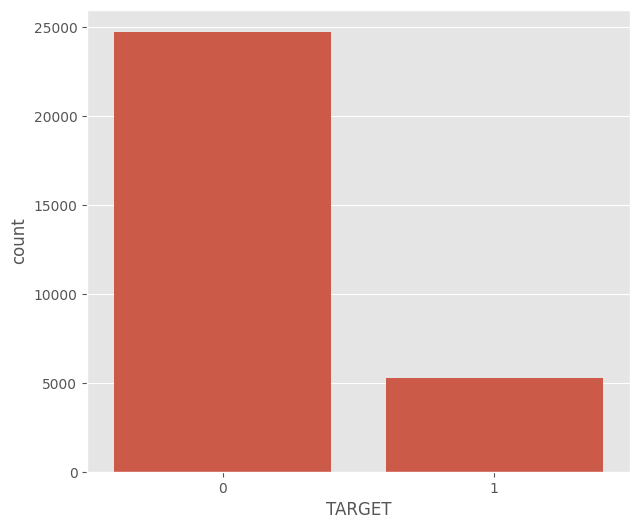

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,6))
sns.countplot(x='TARGET', data = syndf)

### **Data Augmentation:**

#### SMOTE:

Test-Train Split:

In [26]:
# X1 = df1.drop(['TARGET'], axis = 1)
# Y1 = df1['TARGET']

In [27]:
#y1 = df1.iloc[:, 0].values
#x1 = df1.iloc[:, 1:29].values

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,stratify=y)
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [28]:
# from sklearn.model_selection import train_test_split
# X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.25, random_state = 5)

In [29]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42)
# X1_train, Y1_train = sm.fit_resample(X1_train, Y1_train)

In [30]:
# X1_train.shape

In [31]:
# X_Full = np.hstack((X1_train,Y1_train.values.reshape(-1,1)))
# sdf1 = pd.DataFrame(X_Full,columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,'TARGET'])
# plt.figure(figsize=(7,6))
# sns.countplot('TARGET', data = sdf1)

#### Bootstrap Method:

In [32]:
# resample uses "bootstrapping" method to regenrate samples by randomly selecting data for each class
from sklearn.utils import resample
df_0 = syndf[syndf['TARGET'] == 0]
df_1 = syndf[syndf['TARGET'] == 1]
df_1.shape

(5274, 29)

In [33]:
# Apply Resample
df_1_upsample = resample(df_1, n_samples = 23864, replace = True, random_state = 123)
df_1_upsample.shape

(23864, 29)

In [34]:
d = df_1_upsample.drop_duplicates()
d.shape

(5223, 29)

In [35]:
syndf2 = pd.concat([df_0, df_1_upsample])
syndf2['TARGET'].value_counts()

0    24726
1    23864
Name: TARGET, dtype: int64

<Axes: xlabel='TARGET', ylabel='count'>

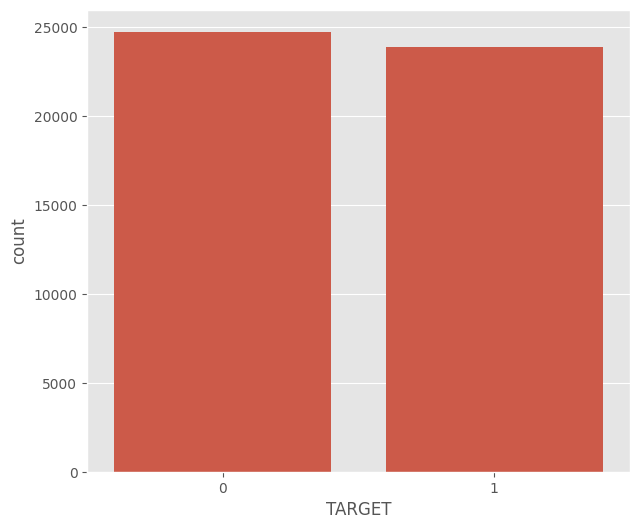

In [36]:
plt.figure(figsize=(7,6))
sns.countplot(x='TARGET', data = syndf2)

##### Test-Train Split:

In [37]:
X1 = syndf2.drop(['TARGET'], axis = 1)
Y1 = syndf2['TARGET']
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.25, random_state = 5)

## **Feature Selection:**

**Using Information Gain:**

In [38]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X1_train, Y1_train)

In [39]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X1_train.columns
mutual_info.sort_values(ascending=False)

TLMaxSum           0.084772
TLSum              0.080113
TLBalHCPct         0.072730
TLOpenPct          0.008816
TLTimeFirst        0.008401
TLSatPct           0.004710
TLDel60CntAll      0.004641
CollectCnt         0.004618
TLTimeLast         0.004120
TLBadCnt24         0.003345
TL75UtilCnt        0.002721
TLCnt              0.002645
TLDel3060Cnt24     0.002472
TLDel60Cnt24       0.001832
TL50UtilCnt        0.001152
TLDel90Cnt24       0.000895
BanruptcyInd       0.000649
TLCnt03            0.000475
InqTimeLast        0.000146
TLBadDerogCnt      0.000000
DerogCnt           0.000000
TLSatCnt           0.000000
TLDel60Cnt         0.000000
TLCnt24            0.000000
TLCnt12            0.000000
InqFinanceCnt24    0.000000
InqCnt06           0.000000
TLOpen24Pct        0.000000
dtype: float64

<Axes: >

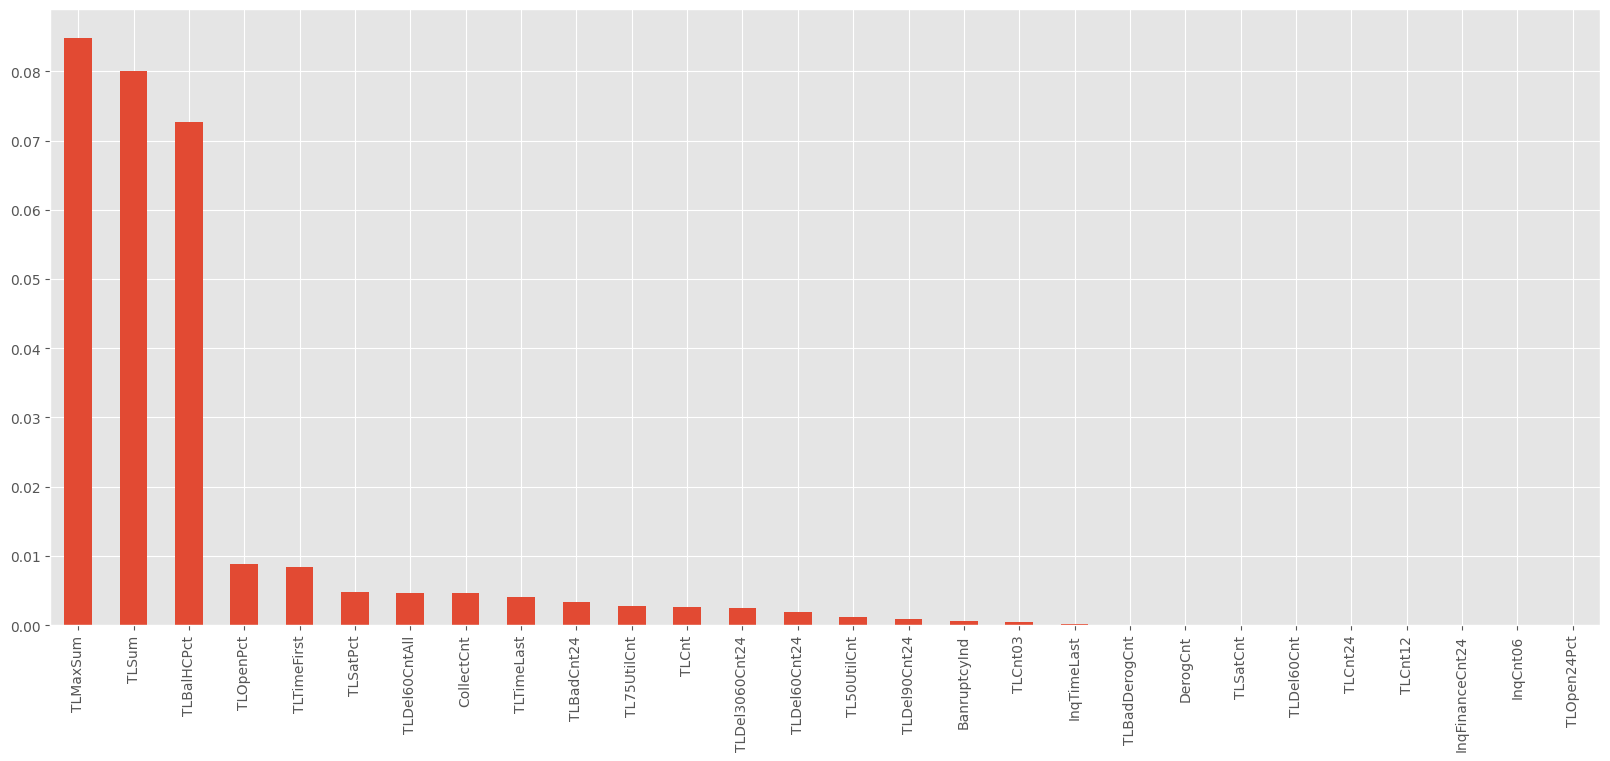

In [40]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Choosing the top 10 features based on information gain:

In [41]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X1_train, Y1_train)
top = X1_train.columns[sel_five_cols.get_support()]
top

Index(['DerogCnt', 'TLTimeFirst', 'TLCnt12', 'TLSum', 'TLMaxSum', 'TLSatCnt',
       'TLBalHCPct', 'TLSatPct', 'TLOpenPct', 'TLOpen24Pct'],
      dtype='object')

In [42]:
X1_train = X1_train[top]
X1_test = X1_test[top]

In [43]:
X1_train

,DerogCnt,TLTimeFirst,TLCnt12,TLSum,TLMaxSum,TLSatCnt,TLBalHCPct,TLSatPct,TLOpenPct,TLOpen24Pct
19473,0,264,1,23139.0,25536.0,7.0,0.6139,0.5769,0.6452,0.6538
24271,0,371,0,19754.0,26572.0,6.0,0.6702,0.7407,0.4615,0.5556
15731,0,189,3,8141.0,73420.0,2.0,0.8159,0.0833,0.3125,0.0000
173,0,224,0,13377.0,17379.0,18.0,0.2044,0.0000,0.2609,0.4286
23736,0,154,0,12113.0,40964.0,12.0,0.7744,0.4118,0.5833,2.0000
...,...,...,...,...,...,...,...,...,...,...
6721,0,122,2,2587.0,98293.0,16.0,0.7733,0.5455,0.6061,0.7500
27315,1,276,0,7833.0,52873.0,47.0,0.3135,0.7714,0.5250,0.0000
24861,1,184,0,61447.0,61570.0,7.0,0.6511,1.0000,0.3750,0.3333
22684,14,92,14,4.0,2997.0,2.0,0.8832,0.3810,0.3600,0.8000


**Using Pearson Correlation:**

<Axes: >

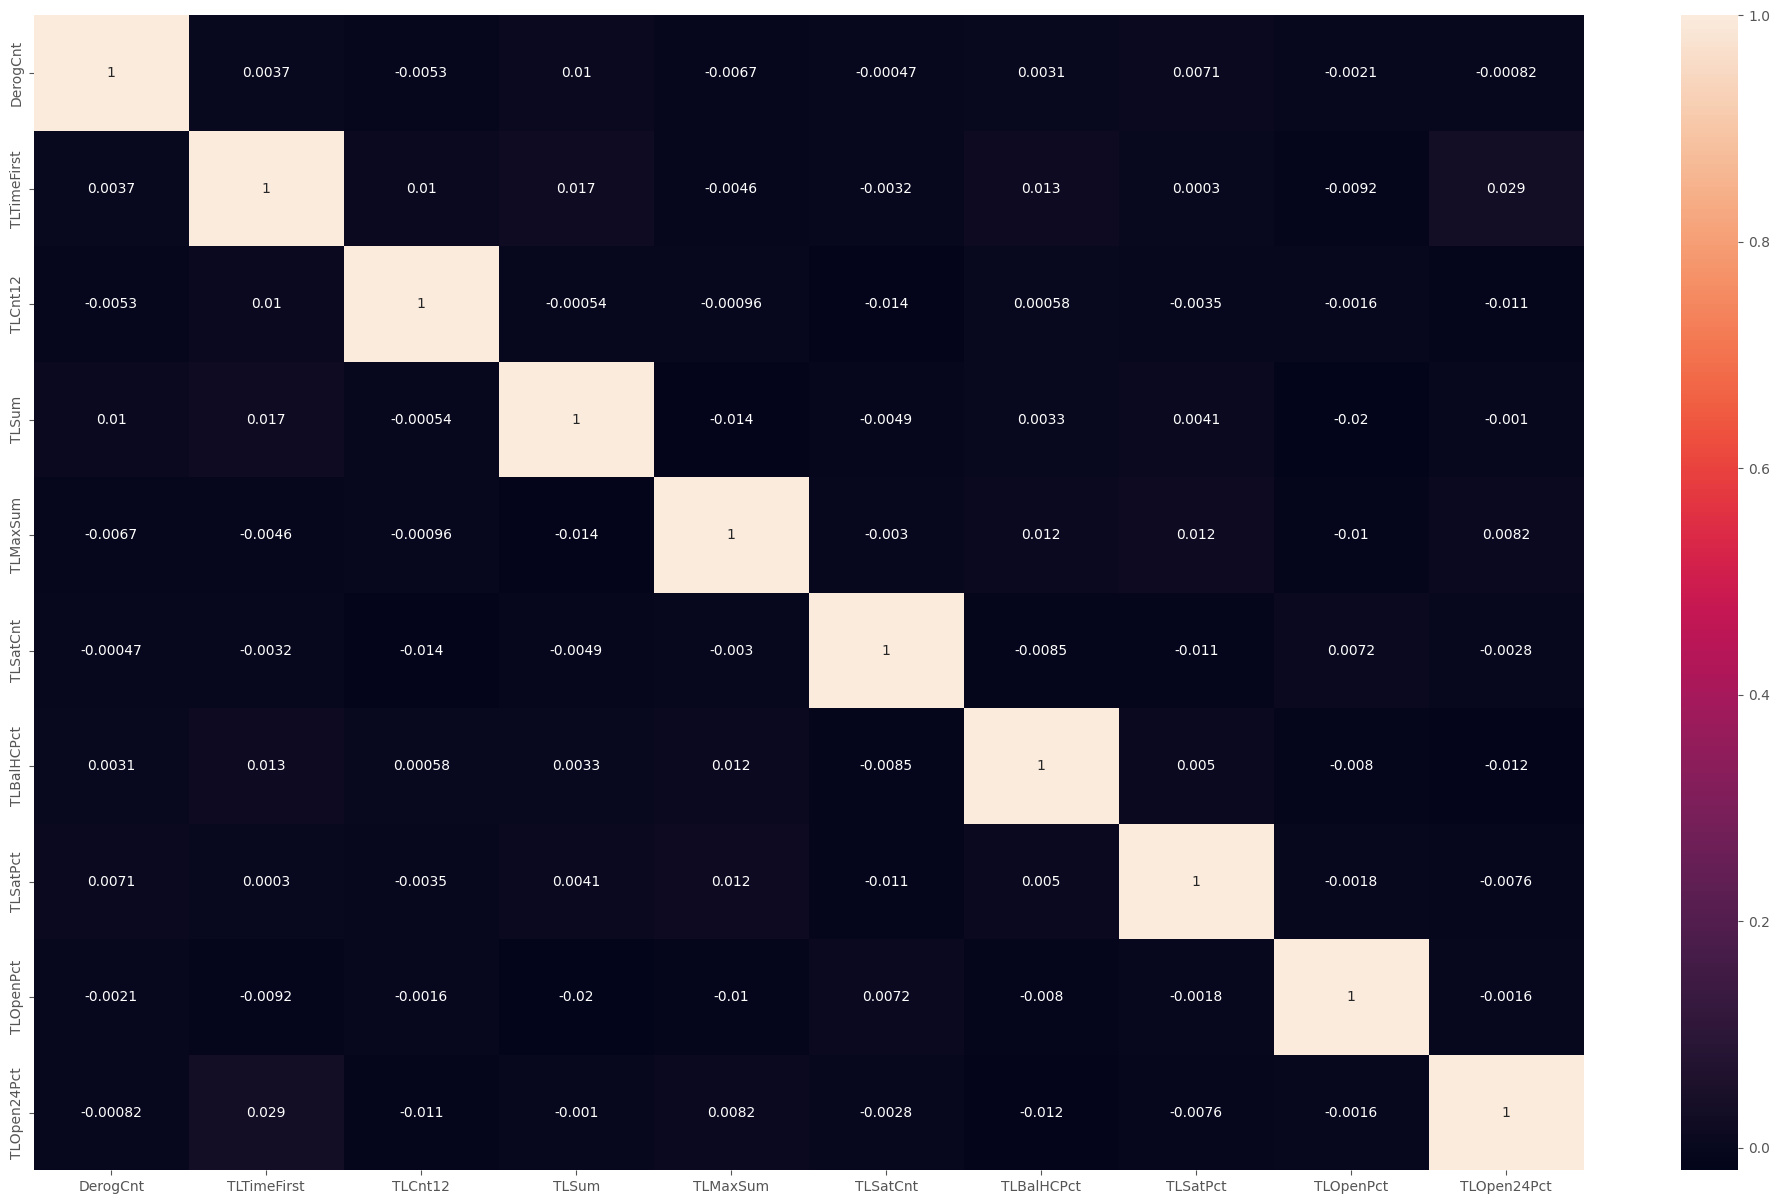

In [44]:
plt.figure(figsize=(25,15))
sns.heatmap(X1_train.corr('pearson'), annot = True)

In [45]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [46]:
corr_features = correlation(X1_train, 0.9)
len(set(corr_features))

0

In [47]:
corr_features

set()

In [48]:
# corr_features2 = ['TLDel60Cnt','TLDel90Cnt24']

Dropping highly Correlated features:

In [49]:
# X1_train = X1_train.drop(corr_features,axis=1)
# X1_test = X1_test.drop(corr_features,axis=1)

## **Model Running and Testing:**

### Logistic Regression:

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
logreg_pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=2))
logreg_pipeline.fit(X1_train, Y1_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=2))])

In [51]:
from sklearn.metrics import accuracy_score
prediction_values = logreg_pipeline.predict(X1_test)
logreg_accuracy = accuracy_score(Y1_test, prediction_values)
print("Accuracy on Test Data: ",logreg_accuracy*100)

Accuracy on Test Data:  50.69970365492262


In [52]:
Y1_Pred = logreg_pipeline.predict(X1_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
report = classification_report(Y1_Pred, Y1_test)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.51      0.61      9154
           1       0.25      0.50      0.33      2994

    accuracy                           0.51     12148
   macro avg       0.50      0.50      0.47     12148
weighted avg       0.63      0.51      0.54     12148



### Decision Tree:

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
# maximum depth of decision trees is 9
dtree_pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion = "entropy", random_state = 0, max_depth = 9))
dtree_pipeline.fit(X1_train, Y1_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=9,
                                        random_state=0))])

In [54]:
from sklearn.metrics import accuracy_score
prediction_values = dtree_pipeline.predict(X1_test)
dtree_accuracy = accuracy_score(Y1_test, prediction_values)
print("Accuracy on Test Data: ",dtree_accuracy*100)

Accuracy on Test Data:  55.06256173855779


In [55]:
Y1_Pred = dtree_pipeline.predict(X1_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
report = classification_report(Y1_Pred, Y1_test)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.55      0.61      7856
           1       0.40      0.56      0.47      4292

    accuracy                           0.55     12148
   macro avg       0.55      0.55      0.54     12148
weighted avg       0.59      0.55      0.56     12148



### Random Forest:

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 18))
rf_pipeline.fit(X1_train, Y1_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=18))])

In [57]:
from sklearn.metrics import accuracy_score
prediction_values = rf_pipeline.predict(X1_test)
rf_accuracy = accuracy_score(Y1_test, prediction_values)
print("Accuracy on Test Data: ",rf_accuracy*100)

Accuracy on Test Data:  98.40302930523544


In [58]:
Y1_Pred = rf_pipeline.predict(X1_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
report = classification_report(Y1_Pred, Y1_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      6325
           1       0.97      1.00      0.98      5823

    accuracy                           0.98     12148
   macro avg       0.98      0.98      0.98     12148
weighted avg       0.98      0.98      0.98     12148



### Support Vector Machine (SVM) Classifier:

In [59]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

Linear:

In [60]:
svm_pipeline1 = make_pipeline(StandardScaler(), SVC(kernel='linear',probability=True))
svm_pipeline1.fit(X1_train, Y1_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear', probability=True))])

In [61]:
from sklearn.metrics import accuracy_score
prediction_values = svm_pipeline1.predict(X1_test)
svm1_accuracy = accuracy_score(Y1_test, prediction_values)
print("Accuracy on Test Data: ",svm1_accuracy*100,"\n")
Y1_Pred = svm_pipeline1.predict(X1_test)
from sklearn.metrics import accuracy_score
report = classification_report(Y1_Pred, Y1_test)
print(report)

Accuracy on Test Data:  50.831412578202176 

              precision    recall  f1-score   support

           0       1.00      0.51      0.67     12148
           1       0.00      0.00      0.00         0

    accuracy                           0.51     12148
   macro avg       0.50      0.25      0.34     12148
weighted avg       1.00      0.51      0.67     12148



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Polynomial:

In [62]:
svm_pipeline2 = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3, probability=True))
svm_pipeline2.fit(X1_train, Y1_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='poly', probability=True))])

In [63]:
from sklearn.metrics import accuracy_score
prediction_values = svm_pipeline2.predict(X1_test)
svm2_accuracy = accuracy_score(Y1_test, prediction_values)
print("Accuracy on Test Data: ",svm2_accuracy*100,"\n")
Y1_Pred = svm_pipeline2.predict(X1_test)
from sklearn.metrics import accuracy_score
report = classification_report(Y1_Pred, Y1_test)
print(report)

Accuracy on Test Data:  51.81922950279881 

              precision    recall  f1-score   support

           0       0.89      0.52      0.65     10720
           1       0.13      0.54      0.21      1428

    accuracy                           0.52     12148
   macro avg       0.51      0.53      0.43     12148
weighted avg       0.80      0.52      0.60     12148



Radial Basis Function (RBF):

In [64]:
svm_pipeline3 = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True))
svm_pipeline3.fit(X1_train, Y1_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(probability=True))])

In [65]:
from sklearn.metrics import accuracy_score
prediction_values = svm_pipeline3.predict(X1_test)
svm3_accuracy = accuracy_score(Y1_test, prediction_values)
print("Accuracy on Test Data: ",svm3_accuracy*100,"\n")
Y1_Pred = svm_pipeline3.predict(X1_test)
from sklearn.metrics import accuracy_score
report = classification_report(Y1_Pred, Y1_test)
print(report)

Accuracy on Test Data:  56.60190977938755 

              precision    recall  f1-score   support

           0       0.62      0.57      0.59      6719
           1       0.51      0.56      0.54      5429

    accuracy                           0.57     12148
   macro avg       0.57      0.57      0.56     12148
weighted avg       0.57      0.57      0.57     12148



Sigmoid:

In [66]:
svm_pipeline4 = make_pipeline(StandardScaler(), SVC(kernel='sigmoid', probability=True))
svm_pipeline4.fit(X1_train, Y1_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='sigmoid', probability=True))])

In [67]:
from sklearn.metrics import accuracy_score
prediction_values = svm_pipeline4.predict(X1_test)
svm4_accuracy = accuracy_score(Y1_test, prediction_values)
print("Accuracy on Test Data: ",svm4_accuracy*100,"\n")
Y1_Pred = svm_pipeline4.predict(X1_test)
from sklearn.metrics import accuracy_score
report = classification_report(Y1_Pred, Y1_test)
print(report)

Accuracy on Test Data:  49.333223575897264 

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      6104
           1       0.49      0.48      0.49      6044

    accuracy                           0.49     12148
   macro avg       0.49      0.49      0.49     12148
weighted avg       0.49      0.49      0.49     12148



### Perceptron:

In [68]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
mlp_pipeline = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu', solver='sgd', max_iter=1000))
mlp_pipeline.fit(X1_train, Y1_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000,
                               solver='sgd'))])

In [69]:
from sklearn.metrics import accuracy_score
prediction_values = mlp_pipeline.predict(X1_test)
mlp_accuracy = accuracy_score(Y1_test, prediction_values)
print("Accuracy on Test Data: ",mlp_accuracy*100)

Accuracy on Test Data:  50.946657886071776


In [70]:
Y1_Pred = mlp_pipeline.predict(X1_test)
from sklearn.metrics import accuracy_score
report = classification_report(Y1_Pred, Y1_test)
print(report)

              precision    recall  f1-score   support

           0       0.64      0.51      0.57      7632
           1       0.38      0.50      0.43      4516

    accuracy                           0.51     12148
   macro avg       0.51      0.51      0.50     12148
weighted avg       0.54      0.51      0.52     12148



### Naive-Bayes:

In [71]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
nb_pipeline = make_pipeline(StandardScaler(), GaussianNB())
nb_pipeline.fit(X1_train, Y1_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

In [72]:
from sklearn.metrics import accuracy_score
prediction_values = nb_pipeline.predict(X1_test)
nb_accuracy = accuracy_score(Y1_test, prediction_values)
print("Accuracy on Test Data: ",nb_accuracy*100)

Accuracy on Test Data:  50.4692130391834


In [73]:
Y1_Pred = nb_pipeline.predict(X1_test)
from sklearn.metrics import accuracy_score
report = classification_report(Y1_Pred, Y1_test)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.51      0.60      8884
           1       0.27      0.49      0.35      3264

    accuracy                           0.50     12148
   macro avg       0.50      0.50      0.47     12148
weighted avg       0.61      0.50      0.53     12148



### XGBoost:

In [74]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import xgboost
from xgboost import XGBClassifier
xgb_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state = 18))
xgb_pipeline.fit(X1_train, Y1_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=18, ...))])

In [75]:
from sklearn.metrics import accuracy_score
prediction_values = xgb_pipeline.predict(X1_test)
xgb_accuracy = accuracy_score(Y1_test, prediction_values)
print("Accuracy on Test Data: ",xgb_accuracy*100)

Accuracy on Test Data:  78.36680935133356


In [76]:
Y1_Pred = xgb_pipeline.predict(X1_test)
from sklearn.metrics import accuracy_score
report = classification_report(Y1_Pred, Y1_test)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      5703
           1       0.82      0.76      0.79      6445

    accuracy                           0.78     12148
   macro avg       0.78      0.79      0.78     12148
weighted avg       0.79      0.78      0.78     12148



### Ensemble - Stacking Classifier:

In [77]:
from sklearn.ensemble import StackingClassifier

In [78]:
def get_stacking():
    #base models:
    level0 = list()
    level0.append(('Logistic Regression', LogisticRegression(random_state=2)))
    level0.append(('Decision Tree', DecisionTreeClassifier(criterion = "entropy", random_state = 0, max_depth = 9)))
    level0.append(('Random Forest',RandomForestClassifier(random_state=18)))
    level0.append(('MLP',MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu', solver='sgd', max_iter=1000)))
    level0.append(('Naive-Bayes',GaussianNB()))
    level0.append(('SVM', SVC(kernel='rbf', probability=True)))
    level0.append(('XGBoost', XGBClassifier(random_state = 18)))
    #meta learner model:
    level1 = XGBClassifier()
    #the stacking ensemble:
    model = StackingClassifier(estimators=level0, final_estimator=level1)
    return model

In [79]:
smodel=get_stacking() #construct a stacking model
st_pipeline = make_pipeline(StandardScaler(), smodel)
st_pipeline.fit(X1_train, Y1_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('stackingclassifier',
                 StackingClassifier(estimators=[('Logistic Regression',
                                                 LogisticRegression(random_state=2)),
                                                ('Decision Tree',
                                                 DecisionTreeClassifier(criterion='entropy',
                                                                        max_depth=9,
                                                                        random_state=0)),
                                                ('Random Forest',
                                                 RandomForestClassifier(random_state=18)),
                                                ('MLP',
                                                 MLPClassifier(hidden_layer_sizes=(1...
                                                                  grow_policy=None,
                                                                  importance_type=None,
                                                                  interaction_constraints=None,
                                                                  learning_rate=None,
                                                                  max_bin=None,
                                                                  max_cat_threshold=None,
                                                                  max_cat_to_onehot=None,
                                                                  max_delta_step=None,
                                                                  max_depth=None,
                                                                  max_leaves=None,
                                                                  min_child_weight=None,
                                                                  missing=nan,
                                                                  monotone_constraints=None,
                                                                  multi_strategy=None,
                                                                  n_estimators=None,
                                                                  n_jobs=None,
                                                                  num_parallel_tree=None,
                                                                  random_state=None, ...)))])

In [80]:
prediction_values = st_pipeline.predict(X1_test)
st_accuracy = accuracy_score(Y1_test, prediction_values)
print("Accuracy on Test Data: ",st_accuracy*100)

Accuracy on Test Data:  98.56766545933488


In [81]:
Y1_Pred = st_pipeline.predict(X1_test)
from sklearn.metrics import accuracy_score
report = classification_report(Y1_Pred, Y1_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      6345
           1       0.97      1.00      0.99      5803

    accuracy                           0.99     12148
   macro avg       0.99      0.99      0.99     12148
weighted avg       0.99      0.99      0.99     12148



## Results:

ACCURACIES:
Random Forest        --> 0.9840302930523543
Logistic Regression  --> 0.5069970365492262
Decision Tree        --> 0.5506256173855779
SVM                  --> 0.5660190977938755
MLP                  --> 0.5094665788607178
Naive-Bayes          --> 0.504692130391834
XGBoost              --> 0.7836680935133356
Stacking             --> 0.9856766545933487


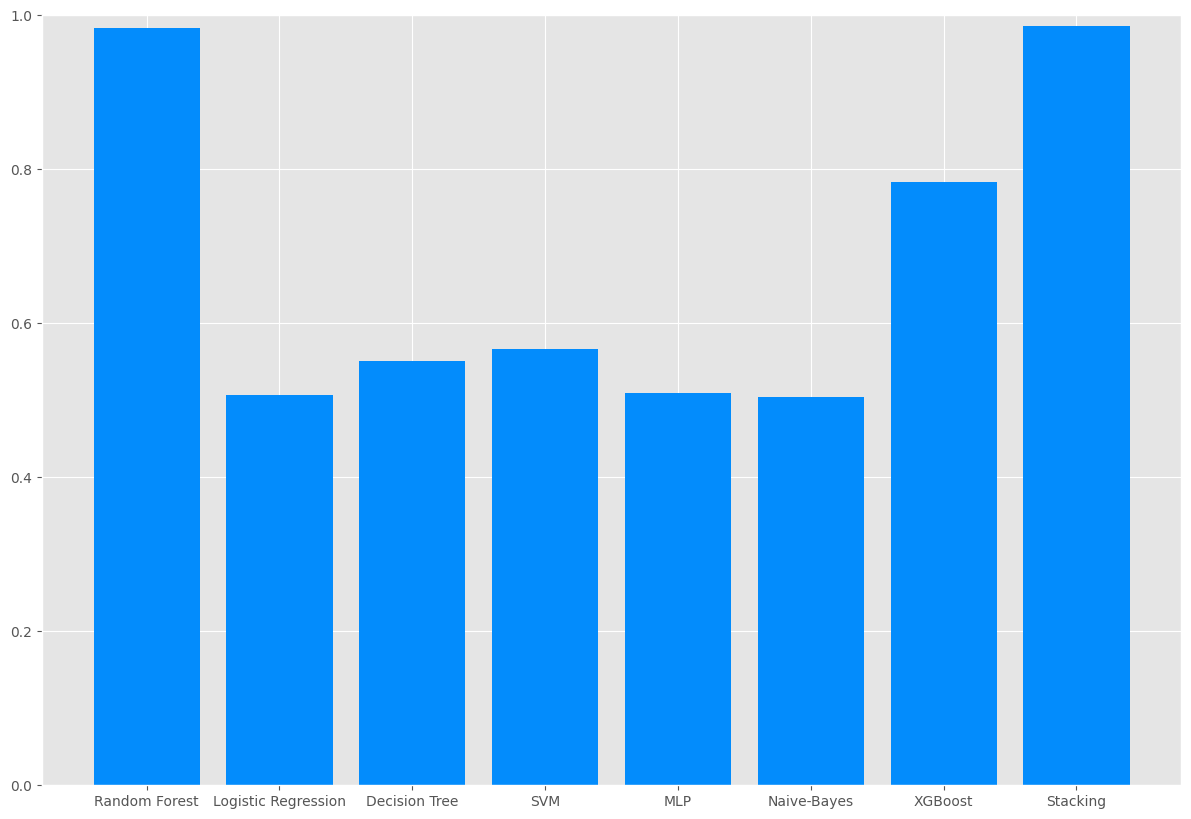

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
names = ['Random Forest','Logistic Regression','Decision Tree','SVM','MLP','Naive-Bayes','XGBoost','Stacking']
values = [rf_accuracy,logreg_accuracy,dtree_accuracy,svm3_accuracy,mlp_accuracy,nb_accuracy,xgb_accuracy,st_accuracy]
f = plt.figure(figsize=(50,10),num=10)
plt.subplot(131)
plt.ylim(0,1)
plt.bar(names,values,color='#038cfc')
j=0
print("ACCURACIES:")
for i in names:
  print('{:20s} --> {}'.format(i,values[j]))
  j+=1

## Profit-Risk Analysis by calculating Estimated Losses

Finding Probablity of Default values:

In [83]:
predictions = st_pipeline.predict_proba(X1_test)

df_prediction_prob = pd.DataFrame(predictions, columns = ['Prob_Good(0)', 'Prob_Bad(1)'])
#df_prediction_target = pd.DataFrame(st_pipeline.predict(X1_test), columns = ['predicted_TARGET'])
#df_test_dataset = pd.DataFrame(Y1_test,columns= ['Actual Outcome'])
#DF=pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)
#DF.head()
df_prediction_prob

,Prob_Good(0),Prob_Bad(1)
0,0.000015,0.999985
1,0.000006,0.999994
2,0.992219,0.007781
3,0.000029,0.999971
4,0.000022,0.999978
...,...,...
12143,0.994238,0.005762
12144,0.961823,0.038177
12145,0.000009,0.999991
12146,0.952344,0.047656


In [84]:
X1_test

,DerogCnt,TLTimeFirst,TLCnt12,TLSum,TLMaxSum,TLSatCnt,TLBalHCPct,TLSatPct,TLOpenPct,TLOpen24Pct
2824,17,406,1,1302.0,11088.0,27.0,0.7092,0.3478,0.2632,0.9167
1047,0,279,1,25937.0,69991.0,15.0,0.8596,0.3889,0.3077,0.5000
7161,13,111,1,18787.0,45227.0,31.0,0.3465,0.0909,0.2174,0.5000
5712,0,31,5,19607.0,2987.0,19.0,0.8508,0.7917,0.4667,1.4286
8040,3,151,7,39919.0,3684.0,44.0,0.1396,0.2727,0.5263,0.0000
...,...,...,...,...,...,...,...,...,...,...
21479,0,145,0,12100.0,7684.0,28.0,0.9250,0.1667,0.4000,0.0000
226,0,355,1,7889.0,22371.0,11.0,0.5983,0.5588,0.1935,0.8571
1932,9,247,15,34909.0,4385.0,44.0,0.7528,0.9412,0.5000,0.1000
14790,0,33,2,24016.0,22633.0,3.0,0.7317,0.4118,0.4839,0.3636


In [111]:
pod = df_prediction_prob['Prob_Bad(1)'].tolist()
df3 = X1_test.copy()
df3['PoD'] = pod
df3

,DerogCnt,TLTimeFirst,TLCnt12,TLSum,TLMaxSum,TLSatCnt,TLBalHCPct,TLSatPct,TLOpenPct,TLOpen24Pct,PoD
2824,17,406,1,1302.0,11088.0,27.0,0.7092,0.3478,0.2632,0.9167,0.999985
1047,0,279,1,25937.0,69991.0,15.0,0.8596,0.3889,0.3077,0.5000,0.999994
7161,13,111,1,18787.0,45227.0,31.0,0.3465,0.0909,0.2174,0.5000,0.007781
5712,0,31,5,19607.0,2987.0,19.0,0.8508,0.7917,0.4667,1.4286,0.999971
8040,3,151,7,39919.0,3684.0,44.0,0.1396,0.2727,0.5263,0.0000,0.999978
...,...,...,...,...,...,...,...,...,...,...,...
21479,0,145,0,12100.0,7684.0,28.0,0.9250,0.1667,0.4000,0.0000,0.005762
226,0,355,1,7889.0,22371.0,11.0,0.5983,0.5588,0.1935,0.8571,0.038177
1932,9,247,15,34909.0,4385.0,44.0,0.7528,0.9412,0.5000,0.1000,0.999991
14790,0,33,2,24016.0,22633.0,3.0,0.7317,0.4118,0.4839,0.3636,0.047656


In [112]:
df3['RR'] = (df3['TLMaxSum'] - df3['TLSum'])  / df3['TLMaxSum']
df3

,DerogCnt,TLTimeFirst,TLCnt12,TLSum,TLMaxSum,TLSatCnt,TLBalHCPct,TLSatPct,TLOpenPct,TLOpen24Pct,PoD,RR
2824,17,406,1,1302.0,11088.0,27.0,0.7092,0.3478,0.2632,0.9167,0.999985,0.882576
1047,0,279,1,25937.0,69991.0,15.0,0.8596,0.3889,0.3077,0.5000,0.999994,0.629424
7161,13,111,1,18787.0,45227.0,31.0,0.3465,0.0909,0.2174,0.5000,0.007781,0.584607
5712,0,31,5,19607.0,2987.0,19.0,0.8508,0.7917,0.4667,1.4286,0.999971,-5.564111
8040,3,151,7,39919.0,3684.0,44.0,0.1396,0.2727,0.5263,0.0000,0.999978,-9.835776
...,...,...,...,...,...,...,...,...,...,...,...,...
21479,0,145,0,12100.0,7684.0,28.0,0.9250,0.1667,0.4000,0.0000,0.005762,-0.574701
226,0,355,1,7889.0,22371.0,11.0,0.5983,0.5588,0.1935,0.8571,0.038177,0.647356
1932,9,247,15,34909.0,4385.0,44.0,0.7528,0.9412,0.5000,0.1000,0.999991,-6.961003
14790,0,33,2,24016.0,22633.0,3.0,0.7317,0.4118,0.4839,0.3636,0.047656,-0.061105


In [113]:
df3['LGD'] = df3['TLSum'] * (1-df3['RR'])
df3

,DerogCnt,TLTimeFirst,TLCnt12,TLSum,TLMaxSum,TLSatCnt,TLBalHCPct,TLSatPct,TLOpenPct,TLOpen24Pct,PoD,RR,LGD
2824,17,406,1,1302.0,11088.0,27.0,0.7092,0.3478,0.2632,0.9167,0.999985,0.882576,152.886364
1047,0,279,1,25937.0,69991.0,15.0,0.8596,0.3889,0.3077,0.5000,0.999994,0.629424,9611.635339
7161,13,111,1,18787.0,45227.0,31.0,0.3465,0.0909,0.2174,0.5000,0.007781,0.584607,7803.996927
5712,0,31,5,19607.0,2987.0,19.0,0.8508,0.7917,0.4667,1.4286,0.999971,-5.564111,128702.527285
8040,3,151,7,39919.0,3684.0,44.0,0.1396,0.2727,0.5263,0.0000,0.999978,-9.835776,432553.355320
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21479,0,145,0,12100.0,7684.0,28.0,0.9250,0.1667,0.4000,0.0000,0.005762,-0.574701,19053.878188
226,0,355,1,7889.0,22371.0,11.0,0.5983,0.5588,0.1935,0.8571,0.038177,0.647356,2782.008895
1932,9,247,15,34909.0,4385.0,44.0,0.7528,0.9412,0.5000,0.1000,0.999991,-6.961003,277910.668415
14790,0,33,2,24016.0,22633.0,3.0,0.7317,0.4118,0.4839,0.3636,0.047656,-0.061105,25483.508859


In [114]:
df3['ES'] = df3['PoD'] * df3['LGD']
df3

,DerogCnt,TLTimeFirst,TLCnt12,TLSum,TLMaxSum,TLSatCnt,TLBalHCPct,TLSatPct,TLOpenPct,TLOpen24Pct,PoD,RR,LGD,ES
2824,17,406,1,1302.0,11088.0,27.0,0.7092,0.3478,0.2632,0.9167,0.999985,0.882576,152.886364,152.884104
1047,0,279,1,25937.0,69991.0,15.0,0.8596,0.3889,0.3077,0.5000,0.999994,0.629424,9611.635339,9611.581486
7161,13,111,1,18787.0,45227.0,31.0,0.3465,0.0909,0.2174,0.5000,0.007781,0.584607,7803.996927,60.725661
5712,0,31,5,19607.0,2987.0,19.0,0.8508,0.7917,0.4667,1.4286,0.999971,-5.564111,128702.527285,128698.768363
8040,3,151,7,39919.0,3684.0,44.0,0.1396,0.2727,0.5263,0.0000,0.999978,-9.835776,432553.355320,432543.919039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21479,0,145,0,12100.0,7684.0,28.0,0.9250,0.1667,0.4000,0.0000,0.005762,-0.574701,19053.878188,109.796309
226,0,355,1,7889.0,22371.0,11.0,0.5983,0.5588,0.1935,0.8571,0.038177,0.647356,2782.008895,106.208231
1932,9,247,15,34909.0,4385.0,44.0,0.7528,0.9412,0.5000,0.1000,0.999991,-6.961003,277910.668415,277908.084311
14790,0,33,2,24016.0,22633.0,3.0,0.7317,0.4118,0.4839,0.3636,0.047656,-0.061105,25483.508859,1214.432406


In [115]:
df3['ES'] = df3['ES'].apply(lambda x: x*-1)
df3

,DerogCnt,TLTimeFirst,TLCnt12,TLSum,TLMaxSum,TLSatCnt,TLBalHCPct,TLSatPct,TLOpenPct,TLOpen24Pct,PoD,RR,LGD,ES
2824,17,406,1,1302.0,11088.0,27.0,0.7092,0.3478,0.2632,0.9167,0.999985,0.882576,152.886364,-152.884104
1047,0,279,1,25937.0,69991.0,15.0,0.8596,0.3889,0.3077,0.5000,0.999994,0.629424,9611.635339,-9611.581486
7161,13,111,1,18787.0,45227.0,31.0,0.3465,0.0909,0.2174,0.5000,0.007781,0.584607,7803.996927,-60.725661
5712,0,31,5,19607.0,2987.0,19.0,0.8508,0.7917,0.4667,1.4286,0.999971,-5.564111,128702.527285,-128698.768363
8040,3,151,7,39919.0,3684.0,44.0,0.1396,0.2727,0.5263,0.0000,0.999978,-9.835776,432553.355320,-432543.919039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21479,0,145,0,12100.0,7684.0,28.0,0.9250,0.1667,0.4000,0.0000,0.005762,-0.574701,19053.878188,-109.796309
226,0,355,1,7889.0,22371.0,11.0,0.5983,0.5588,0.1935,0.8571,0.038177,0.647356,2782.008895,-106.208231
1932,9,247,15,34909.0,4385.0,44.0,0.7528,0.9412,0.5000,0.1000,0.999991,-6.961003,277910.668415,-277908.084311
14790,0,33,2,24016.0,22633.0,3.0,0.7317,0.4118,0.4839,0.3636,0.047656,-0.061105,25483.508859,-1214.432406


In [116]:
df3['Predicted TARGET'] = prediction_values.tolist()
df3

,DerogCnt,TLTimeFirst,TLCnt12,TLSum,TLMaxSum,TLSatCnt,TLBalHCPct,TLSatPct,TLOpenPct,TLOpen24Pct,PoD,RR,LGD,ES,Predicted TARGET
2824,17,406,1,1302.0,11088.0,27.0,0.7092,0.3478,0.2632,0.9167,0.999985,0.882576,152.886364,-152.884104,1
1047,0,279,1,25937.0,69991.0,15.0,0.8596,0.3889,0.3077,0.5000,0.999994,0.629424,9611.635339,-9611.581486,1
7161,13,111,1,18787.0,45227.0,31.0,0.3465,0.0909,0.2174,0.5000,0.007781,0.584607,7803.996927,-60.725661,0
5712,0,31,5,19607.0,2987.0,19.0,0.8508,0.7917,0.4667,1.4286,0.999971,-5.564111,128702.527285,-128698.768363,1
8040,3,151,7,39919.0,3684.0,44.0,0.1396,0.2727,0.5263,0.0000,0.999978,-9.835776,432553.355320,-432543.919039,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21479,0,145,0,12100.0,7684.0,28.0,0.9250,0.1667,0.4000,0.0000,0.005762,-0.574701,19053.878188,-109.796309,0
226,0,355,1,7889.0,22371.0,11.0,0.5983,0.5588,0.1935,0.8571,0.038177,0.647356,2782.008895,-106.208231,0
1932,9,247,15,34909.0,4385.0,44.0,0.7528,0.9412,0.5000,0.1000,0.999991,-6.961003,277910.668415,-277908.084311,1
14790,0,33,2,24016.0,22633.0,3.0,0.7317,0.4118,0.4839,0.3636,0.047656,-0.061105,25483.508859,-1214.432406,0


In [117]:
df3 = df3.sort_values(by=['PoD'])
df3

,DerogCnt,TLTimeFirst,TLCnt12,TLSum,TLMaxSum,TLSatCnt,TLBalHCPct,TLSatPct,TLOpenPct,TLOpen24Pct,PoD,RR,LGD,ES,Predicted TARGET
3004,0,786,1,1352.0,64740.0,13.0,0.8989,0.3571,0.2121,3.0000,0.000158,0.979116,28.234538,-0.004464,0
1547,0,140,1,50432.0,12757.0,13.0,0.0103,0.6923,0.6818,0.2000,0.000191,-2.953281,199371.844791,-38.118226,0
2357,0,384,1,54503.0,110089.0,9.0,0.8259,0.4500,0.6250,3.3333,0.000388,0.504919,26983.413502,-10.471458,0
12289,9,305,2,1453.0,24259.0,7.0,0.9644,0.3636,0.0833,1.8571,0.000509,0.940105,87.027866,-0.044336,0
25688,0,73,7,3960.0,16034.0,44.0,0.5613,0.7391,0.2895,4.5000,0.000580,0.753025,978.021704,-0.566795,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17758,0,467,0,16053.0,869.0,33.0,0.4020,0.0556,0.5161,0.6667,0.999998,-17.472957,296546.385501,-296545.855234,1
28280,0,93,2,4761.0,14491.0,7.0,0.2681,0.1200,0.3514,0.1333,0.999998,0.671451,1564.220620,-1564.217823,1
29137,2,159,0,22309.0,63224.0,9.0,0.4074,0.6333,0.4000,0.3750,0.999998,0.647143,7871.875886,-7871.863687,1
29137,2,159,0,22309.0,63224.0,9.0,0.4074,0.6333,0.4000,0.3750,0.999998,0.647143,7871.875886,-7871.863687,1


In [118]:
df3 = df3[df3.TLSum != 0]
df3

,DerogCnt,TLTimeFirst,TLCnt12,TLSum,TLMaxSum,TLSatCnt,TLBalHCPct,TLSatPct,TLOpenPct,TLOpen24Pct,PoD,RR,LGD,ES,Predicted TARGET
3004,0,786,1,1352.0,64740.0,13.0,0.8989,0.3571,0.2121,3.0000,0.000158,0.979116,28.234538,-0.004464,0
1547,0,140,1,50432.0,12757.0,13.0,0.0103,0.6923,0.6818,0.2000,0.000191,-2.953281,199371.844791,-38.118226,0
2357,0,384,1,54503.0,110089.0,9.0,0.8259,0.4500,0.6250,3.3333,0.000388,0.504919,26983.413502,-10.471458,0
12289,9,305,2,1453.0,24259.0,7.0,0.9644,0.3636,0.0833,1.8571,0.000509,0.940105,87.027866,-0.044336,0
25688,0,73,7,3960.0,16034.0,44.0,0.5613,0.7391,0.2895,4.5000,0.000580,0.753025,978.021704,-0.566795,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17758,0,467,0,16053.0,869.0,33.0,0.4020,0.0556,0.5161,0.6667,0.999998,-17.472957,296546.385501,-296545.855234,1
28280,0,93,2,4761.0,14491.0,7.0,0.2681,0.1200,0.3514,0.1333,0.999998,0.671451,1564.220620,-1564.217823,1
29137,2,159,0,22309.0,63224.0,9.0,0.4074,0.6333,0.4000,0.3750,0.999998,0.647143,7871.875886,-7871.863687,1
29137,2,159,0,22309.0,63224.0,9.0,0.4074,0.6333,0.4000,0.3750,0.999998,0.647143,7871.875886,-7871.863687,1


In [119]:
 df4 = df3.copy()
 x = df4['Predicted TARGET'] == 1
 df4['revenue'] = np.where(x,df4['ES'],df4['TLSum'])
 df4

,DerogCnt,TLTimeFirst,TLCnt12,TLSum,TLMaxSum,TLSatCnt,TLBalHCPct,TLSatPct,TLOpenPct,TLOpen24Pct,PoD,RR,LGD,ES,Predicted TARGET,revenue
3004,0,786,1,1352.0,64740.0,13.0,0.8989,0.3571,0.2121,3.0000,0.000158,0.979116,28.234538,-0.004464,0,1352.000000
1547,0,140,1,50432.0,12757.0,13.0,0.0103,0.6923,0.6818,0.2000,0.000191,-2.953281,199371.844791,-38.118226,0,50432.000000
2357,0,384,1,54503.0,110089.0,9.0,0.8259,0.4500,0.6250,3.3333,0.000388,0.504919,26983.413502,-10.471458,0,54503.000000
12289,9,305,2,1453.0,24259.0,7.0,0.9644,0.3636,0.0833,1.8571,0.000509,0.940105,87.027866,-0.044336,0,1453.000000
25688,0,73,7,3960.0,16034.0,44.0,0.5613,0.7391,0.2895,4.5000,0.000580,0.753025,978.021704,-0.566795,0,3960.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17758,0,467,0,16053.0,869.0,33.0,0.4020,0.0556,0.5161,0.6667,0.999998,-17.472957,296546.385501,-296545.855234,1,-296545.855234
28280,0,93,2,4761.0,14491.0,7.0,0.2681,0.1200,0.3514,0.1333,0.999998,0.671451,1564.220620,-1564.217823,1,-1564.217823
29137,2,159,0,22309.0,63224.0,9.0,0.4074,0.6333,0.4000,0.3750,0.999998,0.647143,7871.875886,-7871.863687,1,-7871.863687
29137,2,159,0,22309.0,63224.0,9.0,0.4074,0.6333,0.4000,0.3750,0.999998,0.647143,7871.875886,-7871.863687,1,-7871.863687


In [120]:
import math
rev = df4['revenue'].tolist()
for i in rev:
  if math.isinf(i):
    rev.remove(i)

In [121]:
len(rev)

12113

In [122]:
perc = []
net = []
sum = 0
count = 0
per = 1
for i in rev:
  if count<122:
    sum+=i
    count+=1
  else:
    perc.append(per)
    per+=1
    net.append(sum)
    sum = 0
    count = 0
perc.append(per)
net.append(sum)

In [123]:
finaldf = pd.DataFrame(list(zip(perc, net)),columns =['Percentile', 'Net Revenue'])
display(finaldf)

,Percentile,Net Revenue
0,1,3.058862e+06
1,2,3.117171e+06
2,3,2.960242e+06
3,4,2.442649e+06
4,5,2.465810e+06
...,...,...
94,95,-5.218117e+06
95,96,-1.488394e+07
96,97,-6.706652e+06
97,98,-1.840878e+07


In [124]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(finaldf)

    Percentile  Net Revenue
0            1    3.059e+06
1            2    3.117e+06
2            3    2.960e+06
3            4    2.443e+06
4            5    2.466e+06
5            6    2.506e+06
6            7    2.791e+06
7            8    2.545e+06
8            9    2.948e+06
9           10    3.154e+06
10          11    3.058e+06
11          12    2.878e+06
12          13    2.749e+06
13          14    2.964e+06
14          15    2.947e+06
15          16    2.665e+06
16          17    2.580e+06
17          18    2.640e+06
18          19    3.063e+06
19          20    2.541e+06
20          21    2.560e+06
21          22    2.584e+06
22          23    2.602e+06
23          24    2.418e+06
24          25    2.381e+06
25          26    2.087e+06
26          27    2.493e+06
27          28    2.498e+06
28          29    2.448e+06
29          30    2.155e+06
30          31    2.701e+06
31          32    2.457e+06
32          33    2.338e+06
33          34    2.440e+06
34          35    2.

Positive Revenue observed until 51st Percentile